In [80]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:

import seaborn as sns

In [82]:
#loal data 
df = pd.read_csv(r'C:\Users\zjc20\Downloads\python\P感知机\diabetes.csv')
df.head
#df

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [83]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [84]:
df.Outcome.value_counts() #计算每个不同的值（类）在该列中的个数，默认按降序排列。

0    500
1    267
Name: Outcome, dtype: int64

In [85]:
#增加函数复用：我们将label由Outcome改变之
#df['label'] = df.Outcome
#增加了一个列label与Outcome一致


In [86]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [87]:
#df.label.value_counts() #计算每个不同的值（类）在该列中的个数，默认按降序排列。

In [88]:
#print(df.loc[df['label'] == 1 ])

In [89]:
#df1 = df.loc[df['label'] == 1]
#df0 = df.loc[df['label'] == 0]

In [90]:
#plt.scatter(df1[:-1][''],df1[:-1]['DiabetesPedigreeFunction'],label = '1')
#plt.scatter(df0[:-1][''],df0[:-1]['DiabetesPedigreeFunction'],label = '0')
#plt.legend()

<AxesSubplot: >

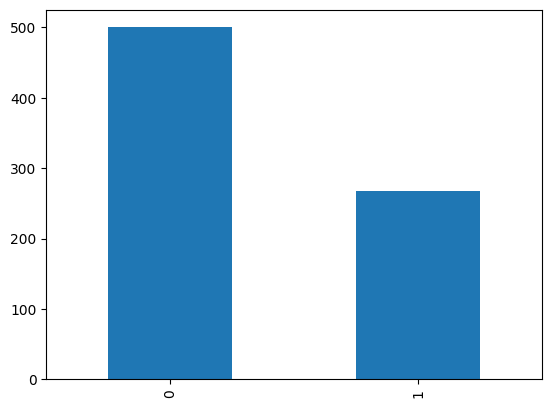

In [91]:
 
#使用柱状图的方式画出标签个数统计
plt.figure()
df.Outcome.value_counts().plot(kind="bar")


In [92]:
#plt.figure()
#sns.pairplot(df,hue="Outcome")

sns.heatmap()用于绘制热力图，热力图表示的是两个数据之间的相关性，数值范围是-1到1之间，大于0表示两个数据之间是正相关的，小于0表示两个数据之间是负相关的，等于0就是不相关。

<AxesSubplot: >

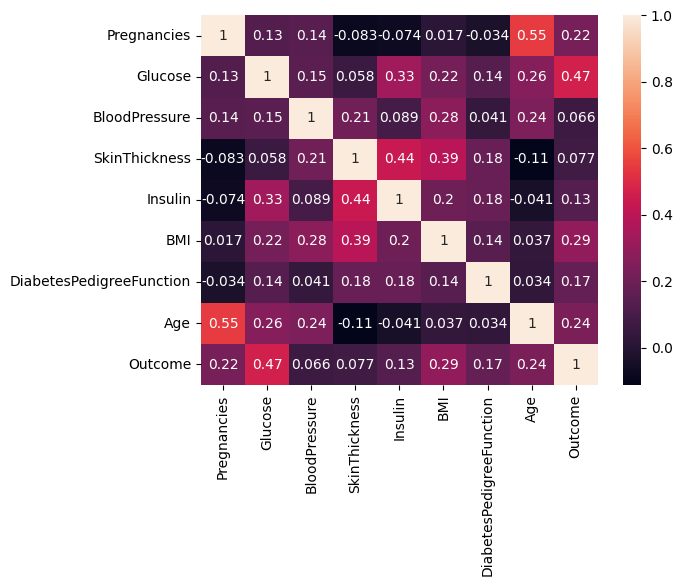

In [109]:
plt.figure()
sns.heatmap(df.corr(), annot=True)


从上述热力图可以看出一些明显的特征，如糖尿病的标签Outcome和葡萄糖测试值Glucose正相关系数比较大，说明葡萄糖测试值高的话，有可能患有糖尿病。同理，年龄Age和怀孕次数Pregnancies之间的相关性也比较强。

In [93]:
# KNN算法
from sklearn.model_selection import train_test_split

In [94]:
# 把数据切分为特征X和标签y
# 切分数据集，test_size=0.3表示30%为测试集。
# stratify=y表示切分后训练集和测试集中的数据类型的比例跟切分前y中的比例一致
# 如切分前y中0和1的比例为1:2，切分后y_train和y_test中0和1的比例也都是1:2
#X = diabetes_data.drop("Outcome",axis = 1)
#y = diabetes_data.Outcome
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, stratify=y)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(\
    df.loc[:,df.columns !='Outcome'],\
    df['Outcome'],stratify=df['Outcome'],random_state=66)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# 保存不同k值测试集准确率
training_accuracy = []
# 保存不同k值训练集准确率
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)


In [98]:
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    #record training set accuracy 保存训练集准确率
    training_accuracy.append(knn.score(X_train,y_train))
    #record test set accuracy  保存测试集准确率
    test_accuracy.append(knn.score(X_test,y_test))


Text(0.5, 0, 'n_neighbors')

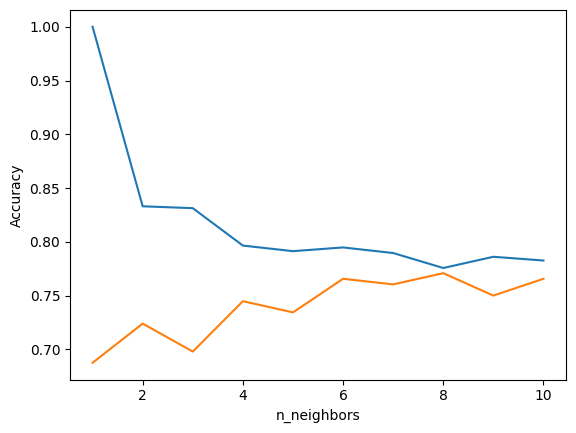

In [99]:
plt.figure()
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
#plt.legend()  # 给图像加上图例
#plt.savefig('knn_compare_model')


In [100]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [101]:
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(\
    knn.score(X_test,y_test)))


Accuracy of K-NN classifier on training set:0.78
Accuracy of K-NN classifier on training set:0.77


In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       139
           1       0.57      0.72      0.63        53

    accuracy                           0.77       192
   macro avg       0.72      0.75      0.73       192
weighted avg       0.79      0.77      0.78       192



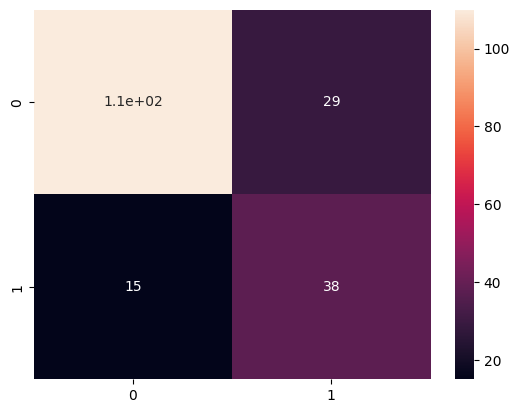

<Figure size 640x480 with 0 Axes>

In [103]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)
plt.figure()

plt.show()


In [110]:
import sklearn
from sklearn.linear_model import Perceptron

In [111]:
sklearn.__version__

'1.1.3'

In [124]:
X_train,X_test,y_train,y_test=train_test_split(\
    df.loc[:,df.columns !='Outcome'],\
    df['Outcome'],stratify=df['Outcome'])

In [138]:
clf = Perceptron(fit_intercept=True,tol = None,max_iter=100000,shuffle=True,n_jobs=-1,)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 2.1640000e+03  4.6300000e+02 -1.4800000e+02  4.5000000e+01
  -1.3000000e+01  1.5595000e+03  1.4403799e+04  1.1900000e+02]]
[-124890.]


In [139]:
acc = clf.score(X_test,y_test)    # 使用测试集进行验证
print(acc)


0.7864583333333334
